In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [10]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [11]:
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, how="left", on="city")

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

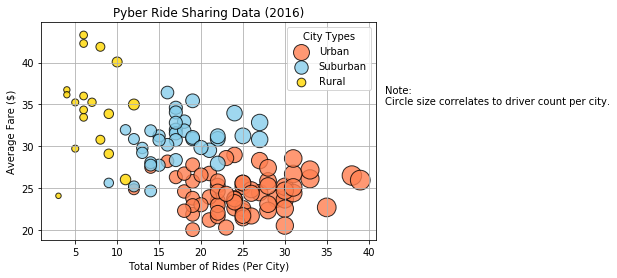

In [12]:
# Obtain the x and y coordinates for each of the three city types
# Data frames for each city types - urban, suburban and rural
urban = city_ride_df.loc[city_ride_df['type'] == "Urban"]
suburban = city_ride_df.loc[city_ride_df["type"]=="Suburban"]
rural = city_ride_df.loc[city_ride_df["type"]=="Rural"]

# total rides per city type
rides_urban = urban.groupby("city")["ride_id"].count()
rides_suburban = suburban.groupby("city")["ride_id"].count()
rides_rural = rural.groupby("city")["ride_id"].count()

# total drivers per city type
drivers_urban = urban.groupby("city")["driver_count"].value_counts()
drivers_suburban = suburban.groupby("city")["driver_count"].value_counts()
drivers_rural = rural.groupby("city")["driver_count"].value_counts()

# average fare per city type
avg_fare_urban = urban.groupby("city")["fare"].mean()
avg_fare_suburban = suburban.groupby("city")["fare"].mean()
avg_fare_rural = rural.groupby("city")["fare"].mean()


# Build the scatter plots for each city types
plt.scatter(rides_urban, avg_fare_urban, s = drivers_urban * 10,
            marker ='o', facecolors = "coral", edgecolors='black',alpha = 0.8, label="Urban")

plt.scatter(rides_suburban, avg_fare_suburban, s = drivers_suburban * 10,
            marker ='o', facecolors = "skyblue", edgecolors='black',alpha = 0.8, label="Suburban")

plt.scatter(rides_rural, avg_fare_rural, s = drivers_rural * 10,
            marker ='o', facecolors = "gold", edgecolors='black',alpha = 0.8, label="Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.grid()

# Create a legend
legend = plt.legend(title= "City Types", loc="best")
frame = legend.get_frame()

# Incorporate a text label regarding circle size
plt.text(42,35,'Note:\nCircle size correlates to driver count per city.', fontsize = 10)

# Save Figure
plt.savefig('pyber_ride_sharing_2016.png')

## Total Fares by City Type

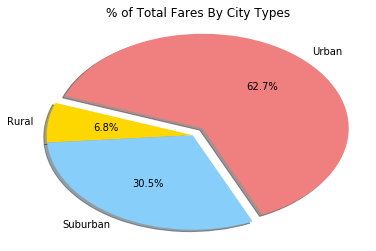

In [13]:
# Calculate Type Percents
total_fare = city_ride_df.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("auto")

# Save Figure
plt.savefig('total_fares_by_city_type.png')

# Show Figure
plt.show()

## Total Rides by City Type

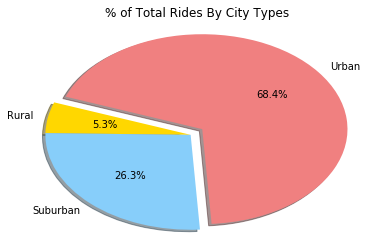

In [14]:
# Calculate Ride Percents
total_rides = city_ride_df.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
#plt.axis("equal")
plt.axis("auto")

# Save Figure
plt.savefig("total_rides_by_city_type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

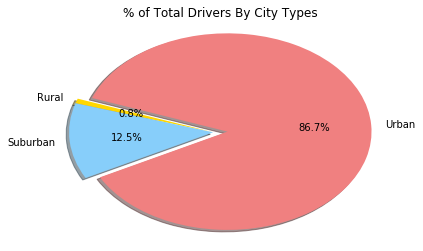

In [15]:
# Calculate Driver Percents
total_drivers = city_ride_df.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
#plt.axis("equal")
plt.axis("auto")

# Save Figure
plt.savefig("total_drivers_by_city_type.png")

# Show Figure
plt.show()

## Trends

There is a negative correlation between the average fare and total number of rides per city: urban cities have the lowest average fare with the highest number of rides, while rural areas have the highest fare and the lowest number of rides.

Urban cities are having twice as many of the total rides than Suburban and Rural areas combined (68.4% vs 31.6%) 

Lower number of drivers in rural areas (2.6% of total drivers) leads to higher average fares compared to those in urban and suburban areas where there is more supply of drivers. At the same time, the lower number of drivers in rural area is due to a low demand of rides (5.3% of all rides)